In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
random_state = 42
np.random.seed(random_state)

def generate_model(N, sigma = 0.1):
  X = np.random.normal(size=[N, D])
  Y = np.random.normal(scale = sigma, size=[N, 1])

  X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size = 0.30, random_state = random_state)

  gamma = N/D

  if gamma < 1:
    beta = X_train.T @ np.linalg.pinv(X_train @ X_train.T) @ Y_train
    bias = (1 - gamma)**2 * np.linalg.norm(beta)**2
    var = gamma * (1 - gamma) * np.linalg.norm(beta)**2 + sigma**2 * (gamma)/(1 - gamma)
    risk = (1-gamma) * np.linalg.norm(beta)**2 + sigma**2 * (gamma)/(1 - gamma)
  else:
    bias = 0
    var = (sigma**2)/(gamma - 1) if gamma != 1 else 1.1
    risk = var

  return bias, var, risk

D = 1000

start = 10
step_size = 10
end = 2000
N = np.arange(start, end + step_size, step_size)

Risk = np.empty((N.shape[0]))
Bias = np.empty((N.shape[0]))
Var = np.empty((N.shape[0]))

for i, n in enumerate(N): Bias[i], Var[i], Risk[i] = generate_model(n)

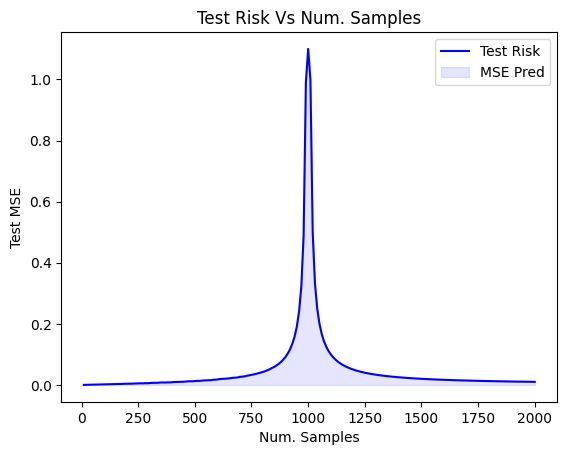

In [3]:
MSE_pred = Bias**2 + Var
plt.plot(N, Risk, color = 'blue', alpha = 1.00)
plt.fill_between(N, MSE_pred, color = 'blue', alpha = .1)
plt.legend(['Test Risk', 'MSE Pred']);
plt.xlabel('Num. Samples')
plt.ylabel('Test MSE')
plt.title("Test Risk Vs Num. Samples")
plt.show()